# Text Summarization & Tweeting an Impactful Tweet

## Setup
To prepare your environment, you need to install some packages.

### Install the necessary packages

You need the latest versions of these packages:<br>

In [1]:
!pip install gensim

    100% |████████████████████████████████| 24.0MB 1.1MB/s ta 0:00:011   31% |██████████▏                     | 7.6MB 2.0MB/s eta 0:00:09
    100% |████████████████████████████████| 133kB 4.2MB/s ta 0:00:011
    100% |████████████████████████████████| 143kB 4.9MB/s ta 0:00:01
    100% |████████████████████████████████| 4.9MB 2.1MB/s ta 0:00:011
    100% |████████████████████████████████| 61kB 8.4MB/s eta 0:00:01
  Running setup.py bdist_wheel for smart-open ... done
  Stored in directory: /Users/nehasetia/Library/Caches/pip/wheels/23/00/44/e5b939f7a80c04e32297dbd6d96fa3065af89ecf57e2b5f89f
  Running setup.py bdist_wheel for bz2file ... done
  Stored in directory: /Users/nehasetia/Library/Caches/pip/wheels/81/75/d6/e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file
distributed 1.21.8 requires msgpack, which is not installed.
textract 1.6.1 has requirement chardet==2.3.0, but you'll have chardet 3.0.4 which is incompatible.
autobahn 18.9.1 has requir

In [2]:
!pip install watson-developer-cloud==1.5

    100% |████████████████████████████████| 225kB 2.8MB/s ta 0:00:01
  Running setup.py bdist_wheel for watson-developer-cloud ... done
  Stored in directory: /Users/nehasetia/Library/Caches/pip/wheels/81/cd/de/4e0916f623c2d125502e493394fd333ed693960264d4b7e524
Successfully built watson-developer-cloud
distributed 1.21.8 requires msgpack, which is not installed.
textract 1.6.1 has requirement chardet==2.3.0, but you'll have chardet 3.0.4 which is incompatible.
autobahn 18.9.1 has requirement six>=1.11.0, but you'll have six 1.10.0 which is incompatible.
  Found existing installation: watson-developer-cloud 1.7.1
    Uninstalling watson-developer-cloud-1.7.1:
      Successfully uninstalled watson-developer-cloud-1.7.1
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
!pip install pyldavis

    100% |████████████████████████████████| 1.6MB 4.0MB/s ta 0:00:01
    100% |████████████████████████████████| 276kB 2.5MB/s ta 0:00:01
    100% |████████████████████████████████| 829kB 2.8MB/s ta 0:00:01
  Running setup.py bdist_wheel for pyldavis ... done
  Stored in directory: /Users/nehasetia/Library/Caches/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /Users/nehasetia/Library/Caches/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built pyldavis future
distributed 1.21.8 requires msgpack, which is not installed.
textract 1.6.1 has requirement chardet==2.3.0, but you'll have chardet 3.0.4 which is incompatible.
autobahn 18.9.1 has requirement six>=1.11.0, but you'll have six 1.10.0 which is incompatible.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
!pip install wordcloud

    100% |████████████████████████████████| 163kB 3.6MB/s ta 0:00:01
distributed 1.21.8 requires msgpack, which is not installed.
textract 1.6.1 has requirement chardet==2.3.0, but you'll have chardet 3.0.4 which is incompatible.
autobahn 18.9.1 has requirement six>=1.11.0, but you'll have six 1.10.0 which is incompatible.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [106]:
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords
import watson_developer_cloud
# import ibm_boto3
# from botocore.client import Config
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import urllib
from bs4 import BeautifulSoup
import requests
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/nehasetia/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/nehasetia/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /Users/nehasetia/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/nehasetia/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /Users/nehasetia/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /Users/nehasetia/nltk_data...
[nltk_data]    |   Package cess_cat is already up-

[nltk_data]    |   Package reuters is already up-to-date!
[nltk_data]    | Downloading package rte to
[nltk_data]    |     /Users/nehasetia/nltk_data...
[nltk_data]    |   Package rte is already up-to-date!
[nltk_data]    | Downloading package semcor to
[nltk_data]    |     /Users/nehasetia/nltk_data...
[nltk_data]    |   Package semcor is already up-to-date!
[nltk_data]    | Downloading package senseval to
[nltk_data]    |     /Users/nehasetia/nltk_data...
[nltk_data]    |   Package senseval is already up-to-date!
[nltk_data]    | Downloading package sentiwordnet to
[nltk_data]    |     /Users/nehasetia/nltk_data...
[nltk_data]    |   Package sentiwordnet is already up-to-date!
[nltk_data]    | Downloading package sentence_polarity to
[nltk_data]    |     /Users/nehasetia/nltk_data...
[nltk_data]    |   Package sentence_polarity is already up-to-date!
[nltk_data]    | Downloading package shakespeare to
[nltk_data]    |     /Users/nehasetia/nltk_data...
[nltk_data]    |   Package shake

True

## 1. Summarization & keywords extraction

### 1a. Helper functions to extract summary and keywords

In [117]:
'''Get the summary of the text'''

def get_summary(text, pct):
    summary = summarize(text,ratio=pct,split=True)
    return summary

def complete_summary(summary):
    summary = " ".join(summary)
    print(type(summary))
    return summary

'''Get the keywords of the text'''

def get_keywords(text):
    res = keywords(text, ratio=0.1, words=None, split=False, scores=False, pos_filter=('NN', 'JJ'), lemmatize=False, deacc=False)
    res = res.split('\n')
    return res

'''Tokenize the sentence into words & remove punctuation'''

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def split_sentences(text):
    """ Split text into sentences.
    """
    sentence_delimiters = re.compile(u'[\\[\\]\n.!?]')
    sentences = sentence_delimiters.split(text)
    return sentences

def split_into_tokens(text):
    """ Split text into tokens.
    """
    tokens = nltk.word_tokenize(text)
    return tokens
    
def POS_tagging(text):
    """ Generate Part of speech tagging of the text.
    """
    POSofText = nltk.tag.pos_tag(text)
    return POSofText

def extract_title_text(url):
    page = urllib.request.urlopen(url).read().decode('utf8')
    soup = BeautifulSoup(page,'lxml')
    text = ' '.join(map(lambda p: p.text, soup.find_all('p')))
    return soup.title.text, text

### 1b. Summarization & keywords extraction

In [152]:
'''Extract the first article of the '''

url = urllib.request.urlopen('https://hostelgeeks.com/favorite-cafe-barcelona-book/').read()
# print(url)
feed = BeautifulSoup(url.decode('utf8'),'lxml')
text = ' '.join(map(lambda p: p.text, feed.find_all('p')))
title = feed.title.text
print(text)
print ('-------------------------------------------------------------------------------------------------------------------')
print('Printing title & text')
print('-----------------------')
print (title, text)
print ('-------------------------------------------------------------------------------------------------------------------')
print('Printing title & summary')
print('--------------------------')
print (title)

summary = get_summary(text, 0.13)
print(summary)

print ('-------------------------------------------------------------------------------------------------------------------')
print ('-------------------------------------------------------------------------------------------------------------------')
print('Printing Keywords')
print('--------------------------')
hashtag_list =[]
for i in get_keywords(text):
    hashtag = '#'+i
    hashtag_list.append(hashtag)
    
hashtag_string = str(" ".join(hashtag_list))
print(hashtag_string)
print ('-------------------------------------------------------------------------------------------------------------------')



I dislike entering book shops. Every time I walk into a book shop, I will end up buying one. I entered an international bookshop in Eixample, Barcelona, while looking for some cool things to do in Barcelona. And as expected, a book named „The dead alleys of Barcelona“ got my attention, a crime novel. Long story shot: I bought it, went home, and started reading. In this book, the author Stefanie Kremser talks about a special part of El Born, downtown Barcelona. She describes this magical square, this narrow street the main character lived in. I didn’t know this exact street, and I was curious. I went downtown, wandered around the square and saw this café with the few tables on the terrace. Until today, 7 years later, it is still my favorite café in Barcelona – thanks to this book! – – – This Short Travel Story was written by Matt, the guy behind Hostelgeeks. Here at Hostelgeeks we award and collect 5 Star Hostels around the world. Fancy more coffee? Find the 13 best coffee shops in Barc

# 2. Topic Modelling

# 2a. Start the preprocessing for Topic Modelling

Topic Modelling is an approach for finding topics in large amounts of text. Topic modeling is great for document clustering, information retrieval from unstructured text, and feature selection.
 
Topic Modeling with Latent Dirichlet Allocation technique.

Why Latent Dirichlet Allocation? This technique can create model which can be generalized easily on any new text corpus and help us in identifying the important topics from the corpus. 

Some of the advantages are :

Training documents may come in sequentially, no random access required.

Runs in constant memory w.r.t. the number of documents: size of the training corpus does not affect memory footprint, can process corpora larger than RAM.

Is distributed & makes use of a cluster of machines, if available, to speed up model estimation.

In [153]:
# article_text = summary
stop_words = set(stopwords.words('english'))
lemma = WordNetLemmatizer()
word_tokens = word_tokenize(str(text)) 
filtered_sentence = [w for w in word_tokens if not w in stop_words]
normalized = " ".join(lemma.lemmatize(word) for word in filtered_sentence)

# 3. Visualization

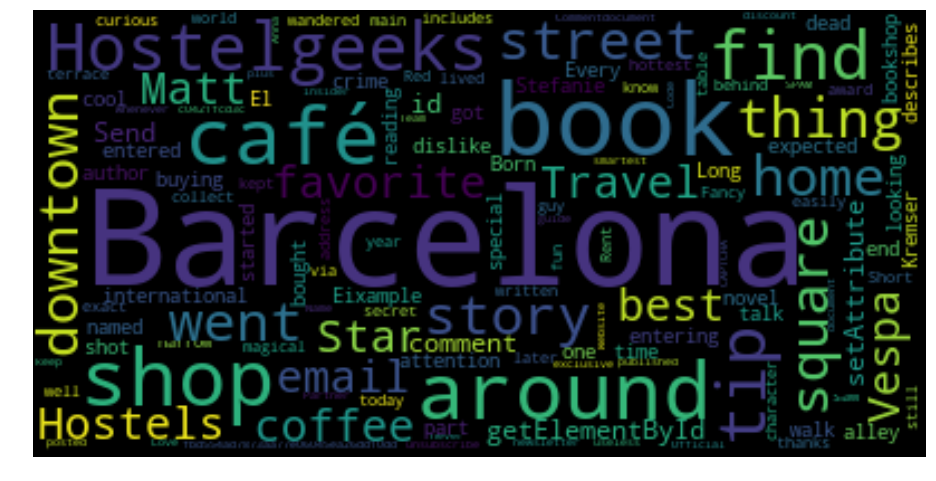

In [154]:
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=60).generate(normalized)
plt.figure(figsize=(16,12))

'''plot wordcloud in matplotlib'''

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 4. Create Topic Model

In [156]:
tokenized_sents = list(sent_to_words(filtered_sentence))
print(tokenized_sents)

# Creating the term dictionary of our corpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(tokenized_sents)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in tokenized_sents]
print(doc_term_matrix)

[[], ['dislike'], ['entering'], ['book'], ['shops'], [], ['every'], ['time'], [], ['walk'], ['book'], ['shop'], [], [], ['end'], ['buying'], ['one'], [], [], ['entered'], ['international'], ['bookshop'], ['eixample'], [], ['barcelona'], [], ['looking'], ['cool'], ['things'], ['barcelona'], [], ['and'], ['expected'], [], ['book'], ['named'], [], ['the'], ['dead'], ['alleys'], ['barcelona'], [], ['got'], ['attention'], [], ['crime'], ['novel'], [], ['long'], ['story'], ['shot'], [], [], ['bought'], [], ['went'], ['home'], [], ['started'], ['reading'], [], ['in'], ['book'], [], ['author'], ['stefanie'], ['kremser'], ['talks'], ['special'], ['part'], ['el'], ['born'], [], ['downtown'], ['barcelona'], [], ['she'], ['describes'], ['magical'], ['square'], [], ['narrow'], ['street'], ['main'], ['character'], ['lived'], [], [], [], ['know'], ['exact'], ['street'], [], [], ['curious'], [], [], ['went'], ['downtown'], [], ['wandered'], ['around'], ['square'], ['saw'], ['cafe'], ['tables'], ['terr

In [173]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Training LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=1, id2word = dictionary, passes=30)

# Print the model output
topics = ldamodel.print_topics(num_words=10)



In [175]:
print(topics)


[(0, '0.032*"barcelona" + 0.017*"book" + 0.011*"hostelgeeks" + 0.011*"around" + 0.011*"cafe"')]


In [179]:
for i in topics:
    print(i[1].split('"')[0])

barcelona


In [158]:
print ('---------------------------------------')
tweet_with_summary_hashtags = complete_summary(summary) + " "+hashtag_string
print(len(tweet_with_summary_hashtags))
print(tweet_with_summary_hashtags)


---------------------------------------
<class 'str'>
280
Until today, 7 years later, it is still my favorite café in Barcelona – thanks to this book! – – – This Short Travel Story was written by Matt, the guy behind Hostelgeeks. Find the 13 best coffee shops in Barcelona here. #barcelona #tips #tip #downtown #vespa #book #story #travel


#### Coherence score is 'higher the better' metric and given the score of 0.86 we can be assured that we have selected the right number of topics for this corpus.

In [159]:
'''Compute Perplexity'''

# a measure of how good the model is. Lower the better.
print('\nPerplexity: ', ldamodel.log_perplexity(doc_term_matrix))

'''Compute Coherence Score'''

coherence_model_lda = CoherenceModel(model=ldamodel, texts=tokenized_sents, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -5.264730579356857

Coherence Score:  0.8709446571273138


### We have seen how to summarize & visualize a document as well as a news article to get quick information about the data. This methodology can be applied to lot of usecases to extract insights from unstructured data.

### 5. Tweeting it on twitter

In [160]:
consumer_key = '<Enter your consumer key>'
consumer_secret = '<Enter your consumer secret>'
access_token = '<Enter your access token>'
access_token_secret = '<enter your access token secret>'

In [161]:
import tweepy

# Twitter requires oAuth2 to access its API:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [162]:
status = api.update_status(tweet_with_summary_hashtags)
print(status.id) 

1073092412916957184
